In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

### **Data Analysis - Business**

Setelah melakukan data cleaning, langkah selanjutnya kita akan melakukan Exploratory Data Analysis untuk mengetahui *performa bisnis* dan *customer behaviour* Olist Ecommerce.

In [2]:
data = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')

In [3]:
# buat copyan data utama
data_eda = data.copy()

# tambahkan kolom tanggal, bulan, tahun 
data_eda['order_date'] = data_eda['order_purchase_timestamp'].dt.date
data_eda['order_month'] = data_eda['order_purchase_timestamp'].dt.to_period('M')
data_eda['order_year'] = data_eda['order_purchase_timestamp'].dt.to_period('Y')

#### **Trend Order**

In [4]:
# Mengcopy dataset 'data_eda' dan menghapus data dengan order_id, order_purchase_timestamp, payment_sequential, dan 'payment_value' yang sama.
data_order_trend = data_eda.copy().drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first')

# drop baris yang memiliki nilai canceled atau unavailable pada kolom order status
data_order_trend = data_order_trend[~data_order_trend['order_status'].isin(['canceled','unavailable'])]


REVENUE

In [5]:
#dfRev = data_order_trend.groupby('order_month').nunique().reset_index()[['order_month','payment_value']]
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month').sum().reset_index()[['order_month','payment_value']]
dfRev['year'] = dfRev['order_month'].dt.strftime('%Y')
dfRev['month'] = dfRev['order_month'].dt.strftime('%B')
dfRev['order_month'] = dfRev['order_month'].dt.strftime('%Y-%m')

total_revenue =dfRev['payment_value'].sum()
average_revenue =dfRev['payment_value'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_13952\1856109420.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month').sum().reset_index()[['order_month','payment_value']]


ORDER

In [6]:
#dfOrd = data_order_trend.groupby('order_month').nunique().reset_index()[['order_month','order_id']]
dfOrd = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month').nunique().reset_index()[['order_month','order_id']]
dfOrd['year'] = dfOrd['order_month'].dt.strftime('%Y')
dfOrd['month'] = dfOrd['order_month'].dt.strftime('%B')
dfOrd['order_month'] = dfOrd['order_month'].dt.strftime('%Y-%m')

total_order = dfOrd['order_id'].sum()
average_order =dfOrd['order_id'].mean()

Customer

In [7]:
#dfCust = data_order_trend.groupby('order_month').nunique().reset_index()[['order_month','customer_unique_id']]
dfCust = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month').nunique().reset_index()[['order_month','customer_unique_id']]
dfCust['year'] = dfCust['order_month'].dt.strftime('%Y')
dfCust['month'] = dfCust['order_month'].dt.strftime('%B')
dfCust['order_month'] = dfCust['order_month'].dt.strftime('%Y-%m')

total_customer = dfCust['customer_unique_id'].sum()
average_customer =dfCust['customer_unique_id'].mean()


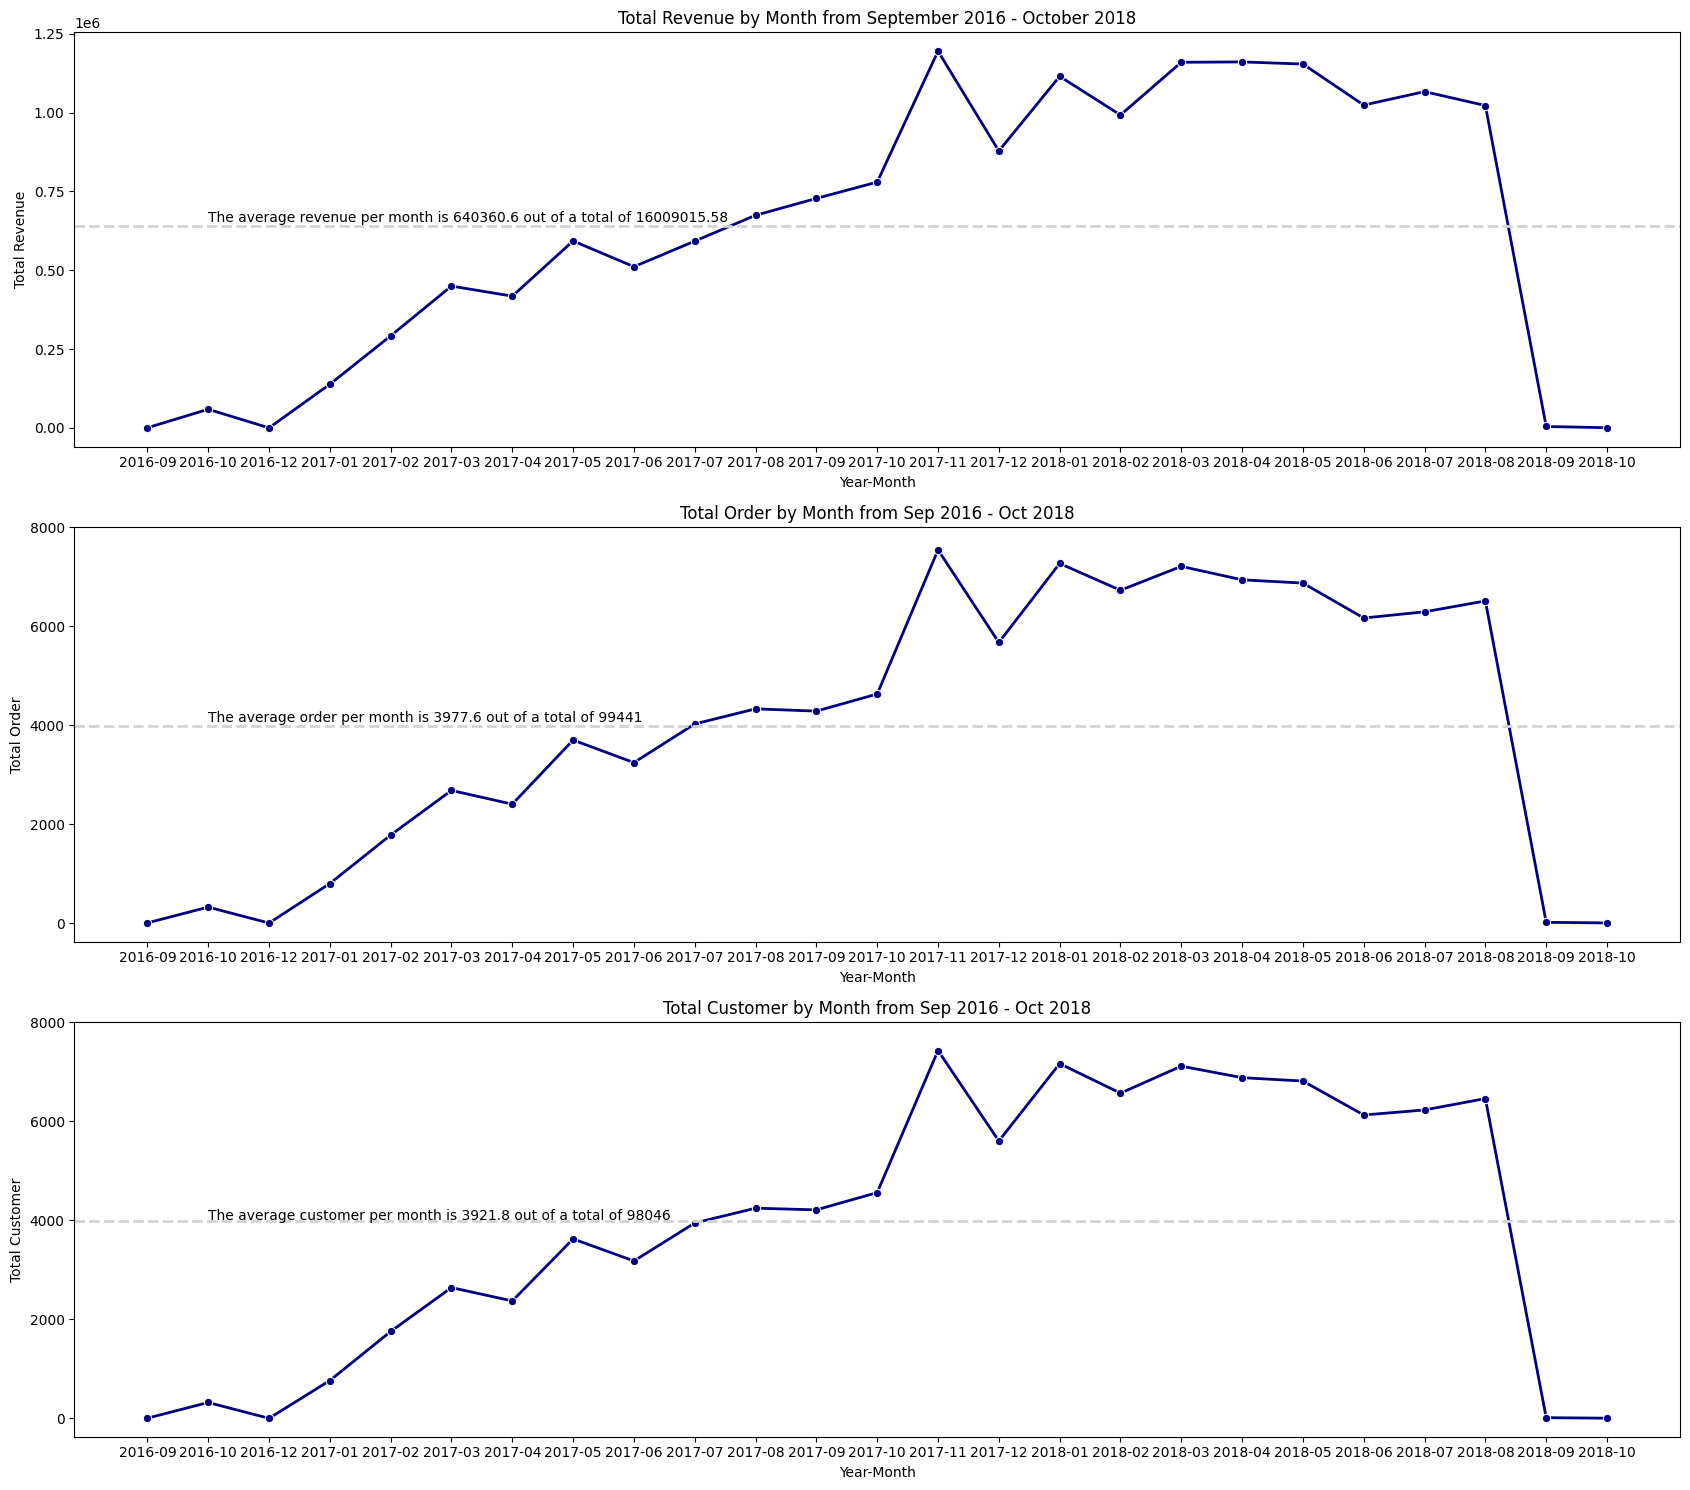

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(17,15))

ax1=sns.lineplot(data=dfRev, x='order_month', y='payment_value', linewidth=2, ax=axes[0], color='navy', marker='o')
ax1.axhline(average_revenue, color='lightgrey', linestyle='--', linewidth=2)
ax1.set_title('Total Revenue by Month from September 2016 - October 2018')
ax1.text(1, average_revenue * 1.02, f'The average revenue per month is {average_revenue:0.1f} out of a total of {total_revenue}')
ax1.set_yticks(range(0,1500000,250000))
ax1.set_ylabel('Total Revenue')
ax1.set_xlabel('Year-Month')

ax2=sns.lineplot(data=dfOrd, x='order_month', y='order_id', linewidth=2, ax=axes[1], color='navy', marker='o')
ax2.axhline(average_order, color='lightgrey', linestyle='--', linewidth=2)
ax2.set_title('Total Order by Month from Sep 2016 - Oct 2018')
ax2.text(1, average_order * 1.02, f'The average order per month is {average_order:0.1f} out of a total of {total_order}')
ax2.set_yticks(range(0,10000,2000))
ax2.set_ylabel('Total Order')
ax2.set_xlabel('Year-Month')

ax3=sns.lineplot(data=dfCust, x='order_month', y='customer_unique_id', linewidth=2, ax=axes[2], color='navy', marker='o')
ax3.axhline(average_order, color='lightgrey', linestyle='--', linewidth=2)
ax3.set_title('Total Customer by Month from Sep 2016 - Oct 2018')
ax3.text(1, average_customer * 1.02, f'The average customer per month is {average_customer:0.1f} out of a total of {total_customer}')
ax3.set_yticks(range(0,10000,2000))
ax3.set_ylabel('Total Customer')
ax3.set_xlabel('Year-Month')

plt.tight_layout()
plt.show()

**Insights**:
* Jumlah pendapatan, jumlah transaksi, dan jumlah pelanggan memiliki pola yang hampir sama untuk setiap bulannya, dimana nilainya cenderung meningkat dari September 2016 hingga akhir tahun 2017 dengan capaian tertinggi terjadi pada bulan November 2017. Sedangkan jumlah pendapatan pada tahun 2018 cenderung stagnan,namun di bulan September dan Oktober 2018 terjadi penurunan nilai secara drastis.


In [9]:
A=data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first')
A.loc[
    (A.order_month == '2018-09') | (A.order_month == '2018-10'),
    ['order_month', 'order_status']
]

,order_month,order_status
107835,2018-09,shipped
107836,2018-09,canceled
107837,2018-09,canceled
107838,2018-09,canceled
107839,2018-09,canceled
107840,2018-09,canceled
107841,2018-09,canceled
107842,2018-09,canceled
107843,2018-09,canceled
107844,2018-09,canceled


C:\Users\hp\AppData\Local\Temp\ipykernel_13952\3626687684.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1=sns.barplot(data=dfRev, x='month', y='payment_value', ax=axes[0], hue='year', ci=None, palette=["green", "navy", "red"])
C:\Users\hp\AppData\Local\Temp\ipykernel_13952\3626687684.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2=sns.barplot(data=dfOrd, x='month', y='order_id', ax=axes[1],  hue='year', ci=None, palette=["green", "navy", "red"])
C:\Users\hp\AppData\Local\Temp\ipykernel_13952\3626687684.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3=sns.barplot(data=dfCust, x='month', y='customer_unique_id', ax=axes[2], hue='year', ci=None, palette=["green", "navy", "red"])


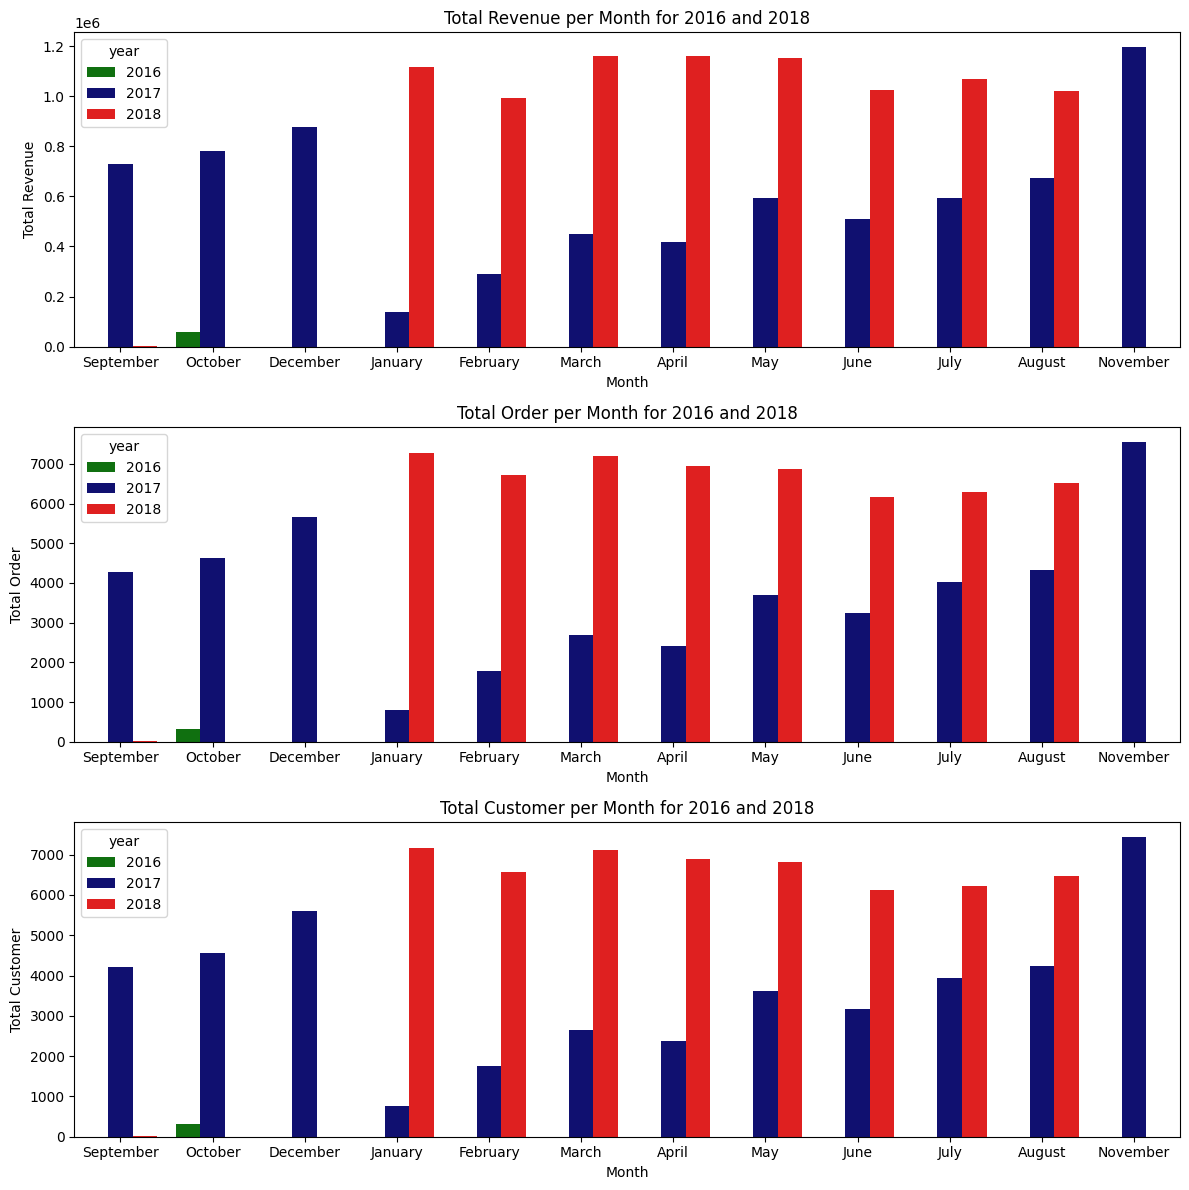

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12,12))

ax1=sns.barplot(data=dfRev, x='month', y='payment_value', ax=axes[0], hue='year', ci=None, palette=["green", "navy", "red"])
ax1.set_title('Total Revenue per Month for 2016 and 2018')
ax1.set_ylabel('Total Revenue')
ax1.set_xlabel('Month')

ax2=sns.barplot(data=dfOrd, x='month', y='order_id', ax=axes[1],  hue='year', ci=None, palette=["green", "navy", "red"])
ax2.set_title('Total Order per Month for 2016 and 2018')
ax2.set_ylabel('Total Order')
ax2.set_xlabel('Month')

ax3=sns.barplot(data=dfCust, x='month', y='customer_unique_id', ax=axes[2], hue='year', ci=None, palette=["green", "navy", "red"])
ax3.set_title('Total Customer per Month for 2016 and 2018')
ax3.set_ylabel('Total Customer')
ax3.set_xlabel('Month')

plt.tight_layout()
plt.show()

Sales by City/State 


In [11]:
df_sales = data_eda.copy().drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first')

In [12]:
df_state_agg = df_sales[['customer_state','payment_value', 'order_id']].groupby('customer_state')\
                            .agg({'payment_value':'sum','order_id':'nunique'}).sort_values('payment_value', ascending=False)\
                            .reset_index()

df_state_agg['average_order_value'] = round(df_state_agg['payment_value']/df_state_agg['order_id'],1)
df_state_agg.head()

,customer_state,payment_value,order_id,average_order_value
0,SP,5998370.42,41746,143.7
1,RJ,2144379.69,12852,166.9
2,MG,1872257.26,11635,160.9
3,RS,890898.54,5466,163.0
4,PR,811156.38,5045,160.8


In [13]:
state_revenue = df_state_agg.sort_values('payment_value', ascending=False)
state_transaction = df_state_agg.sort_values('order_id', ascending=False)
state_average= df_state_agg.sort_values('average_order_value', ascending=False)

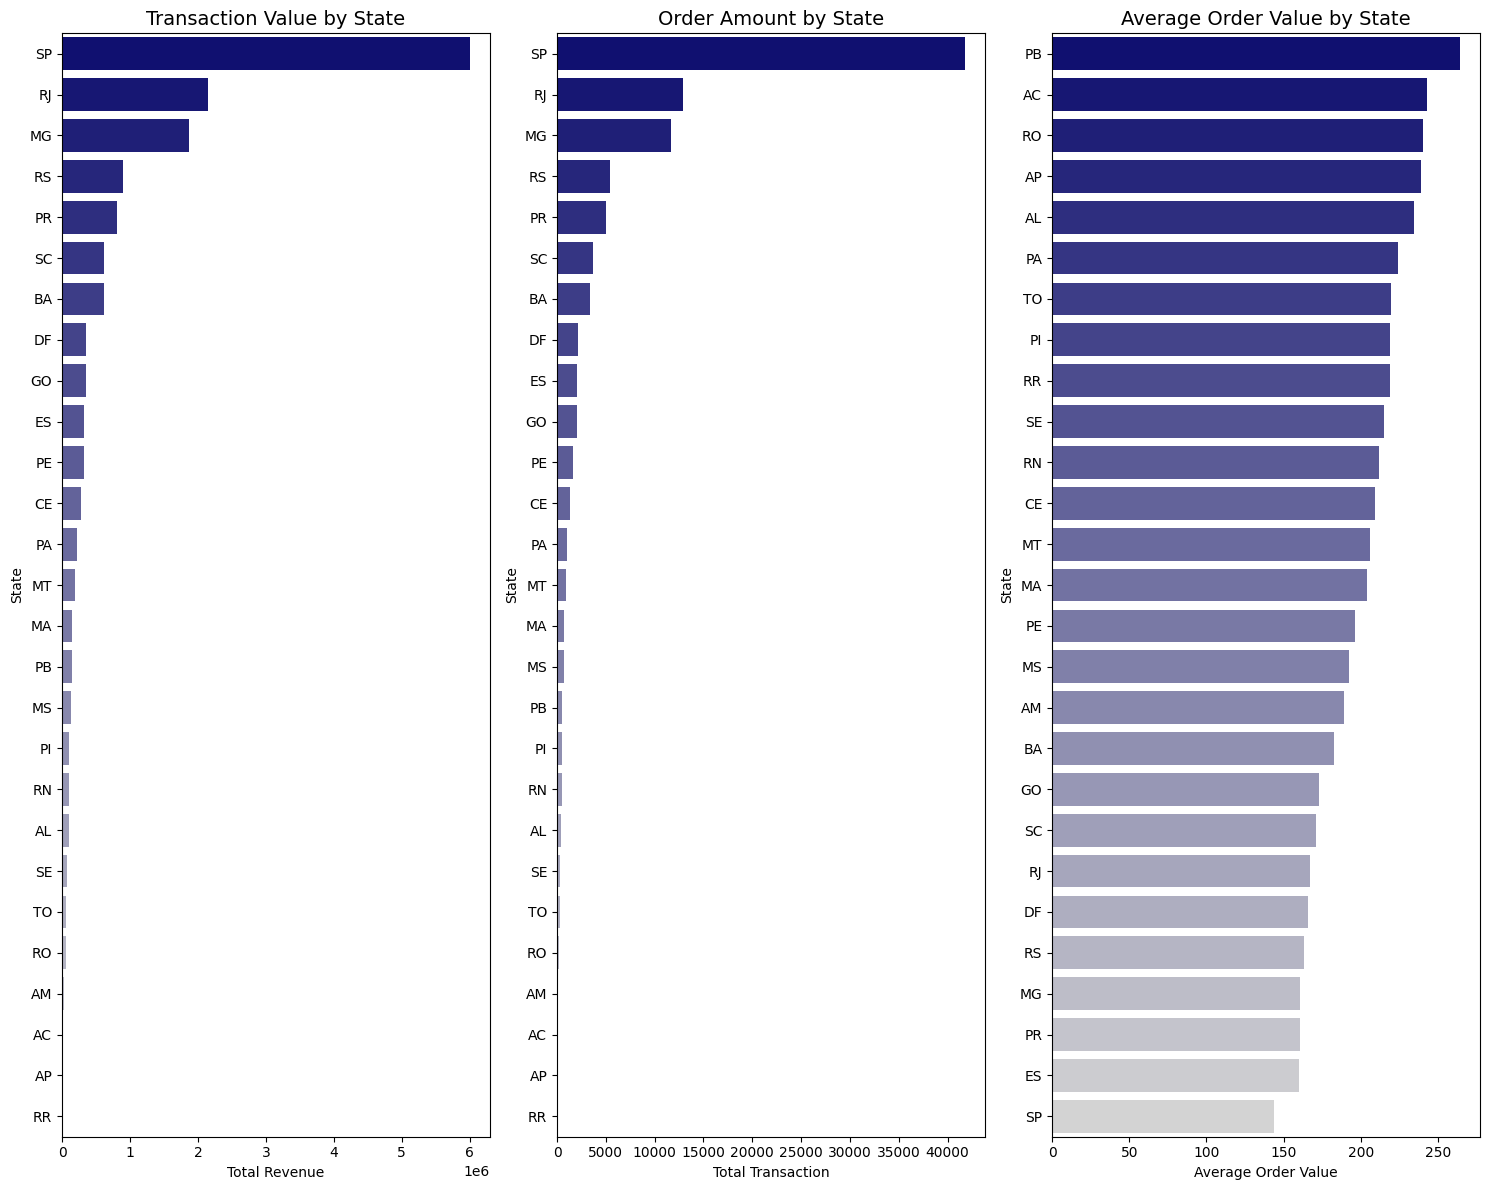

In [14]:
color_palette = sns.blend_palette(['navy', 'lightgrey'], 27)

fig, axes = plt.subplots(1, 3, figsize=(15,12))

ax1 = sns.barplot(data=state_revenue, y='customer_state', x='payment_value', ax=axes[0], palette=color_palette)
ax1.set_ylabel('State')
ax1.set_xlabel('Total Revenue')
ax1.set_title('Transaction Value by State',fontsize=14)

ax2 = sns.barplot(data=state_transaction, y='customer_state', x='order_id', ax=axes[1], palette=color_palette)
ax2.set_ylabel('State')
ax2.set_xlabel('Total Transaction')
ax2.set_title('Order Amount by State',fontsize=14)

ax2 = sns.barplot(data=state_average, y='customer_state', x='average_order_value', ax=axes[2], palette=color_palette)
ax2.set_ylabel('State')
ax2.set_xlabel('Average Order Value')
ax2.set_title('Average Order Value by State',fontsize=14)

plt.tight_layout()
plt.show()

**Insights**:
* Tiga state dengan dengan jumlah transaksi dan pendapatan tertinggi adalah SP (Sao Paulo), RJ (Rio de Janeiro), dan MG (Minas Gerais)
* Sementara itu, state yang memiliki rata-rata pendapatan per transaksi tertinggi yaitu PB (Paraíba), AC (Acre), RO (Rondônia), AP (Amapá), AL (Alagoas)




In [15]:
# buat data untuk analisis trend revenue, order, dan jumlah customer
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month')['payment_value'].sum()
dfOrd = data_eda.groupby('order_month')['order_id'].nunique()
dfCust = data_eda.groupby('order_month')['customer_unique_id'].nunique()

dfTrend = pd.concat([dfRev,dfOrd,dfCust], axis=1).rename(columns={"payment_value": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers"})

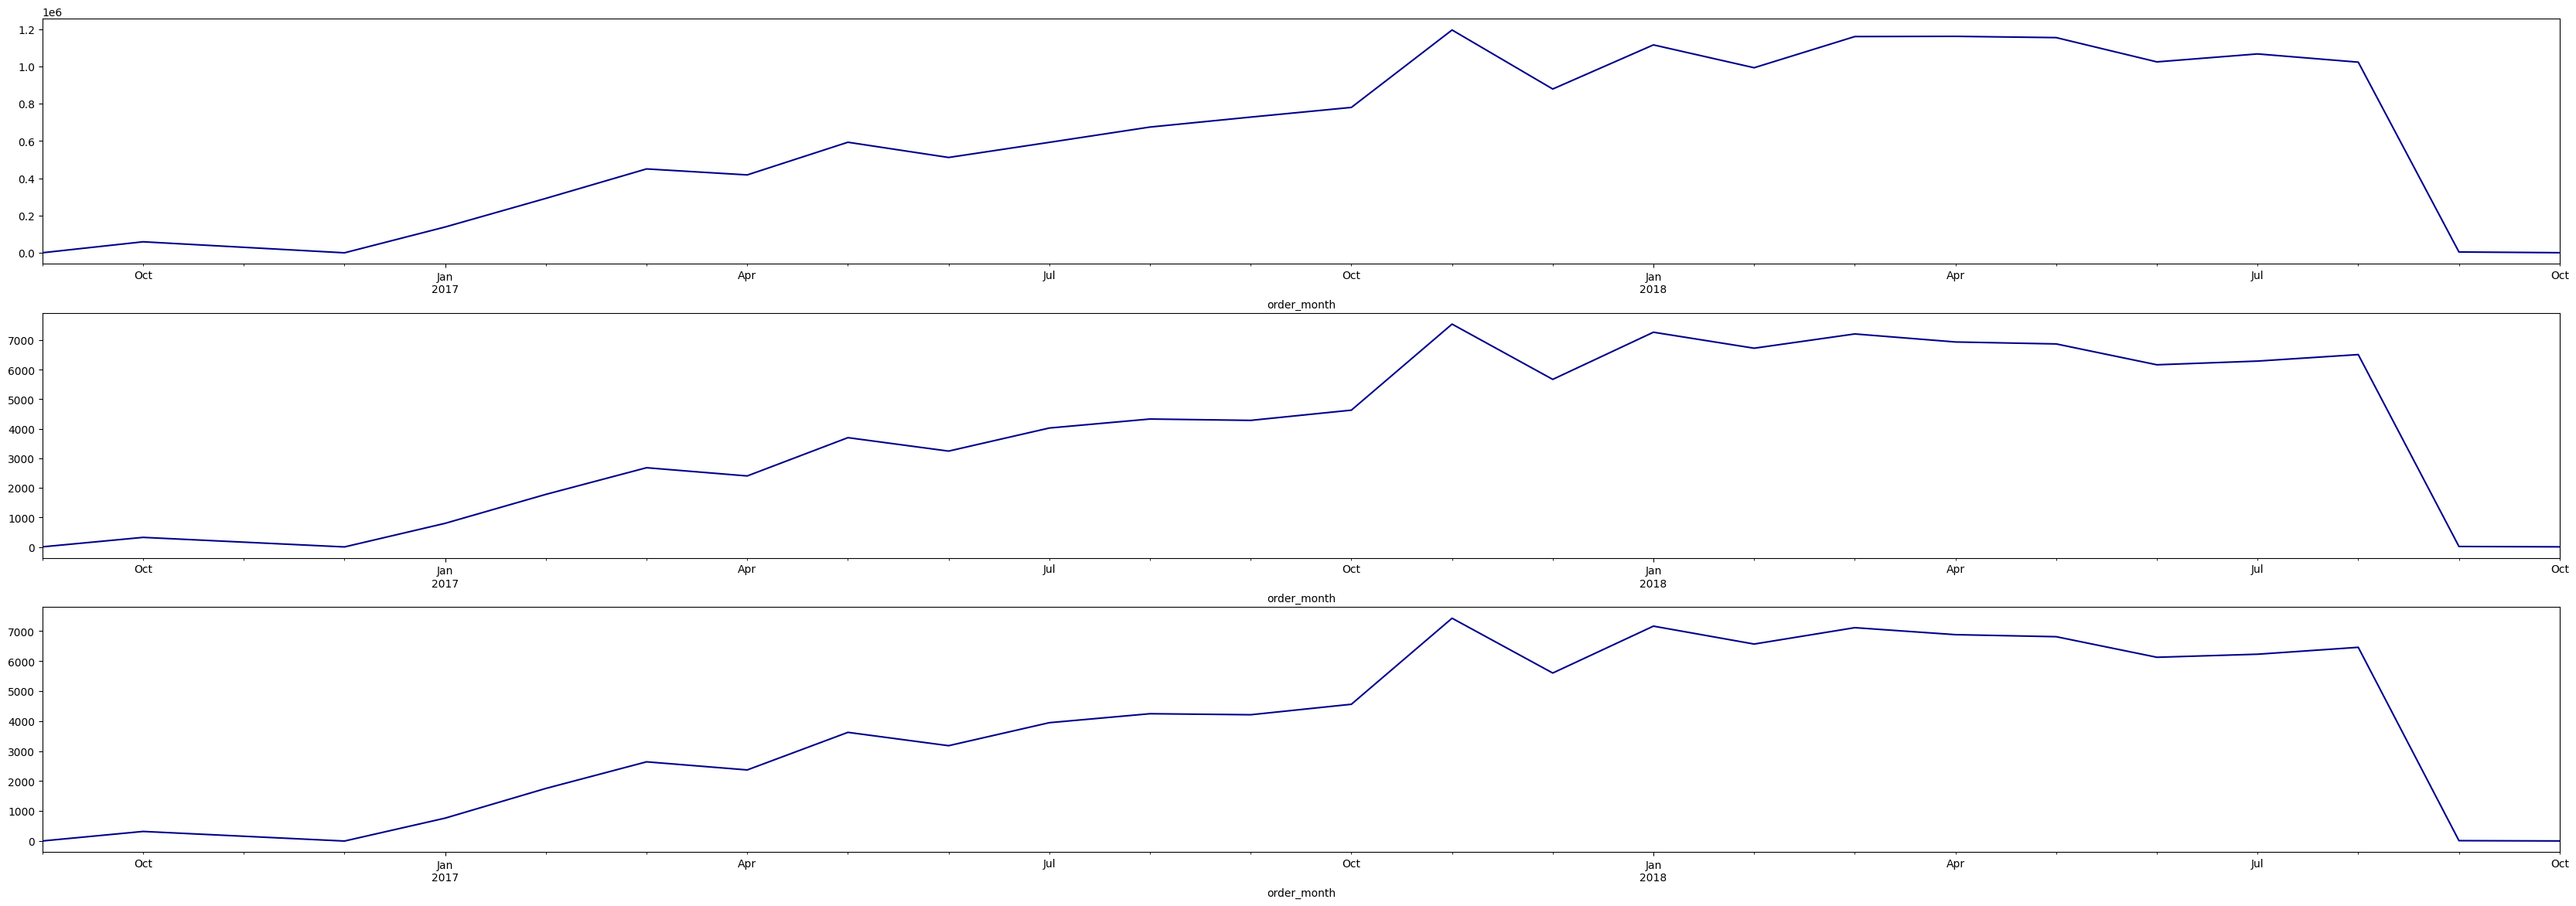

In [16]:
# buat visualisasi
fig, axes = plt.subplots(3,1, figsize=(42, 14))
dfTrend['revenue'].plot(kind='line', color='darkblue', ax=axes[0])
dfTrend['n_orders'].plot(kind='line', color='darkblue', ax=axes[1])
dfTrend['n_customers'].plot(kind='line', color='darkblue', ax=axes[2]);

> - Berdasarkan line chart diatas, dapat dilihat bahwa *revenue* Olist memiliki trend naik setiap bulannya 
> - Hal tersebut disebabkan karena adanya peningkatan order, korelasi bisa dilihat dari pola line chart *order* memiliki kemiripan dengan line chart *revenue*
> - Peningkatan order ini disebabkan karena ada peningkatan jumlah customer yang berbelanja tiap bulannya

#### **Sales berdasarkan State**

In [17]:
# buat data untuk analisis top revenue, order, dan jumlah customer berdasarkan state
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('customer_state')['price'].sum()
dfOrd = data_eda.groupby('customer_state')['order_id'].nunique()
dfCust = data_eda.groupby('customer_state')['customer_unique_id'].nunique()

dfState = pd.concat([dfRev,dfOrd,dfCust], axis=1).reset_index().rename(columns={"price": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers", 'customer_state':'state'})

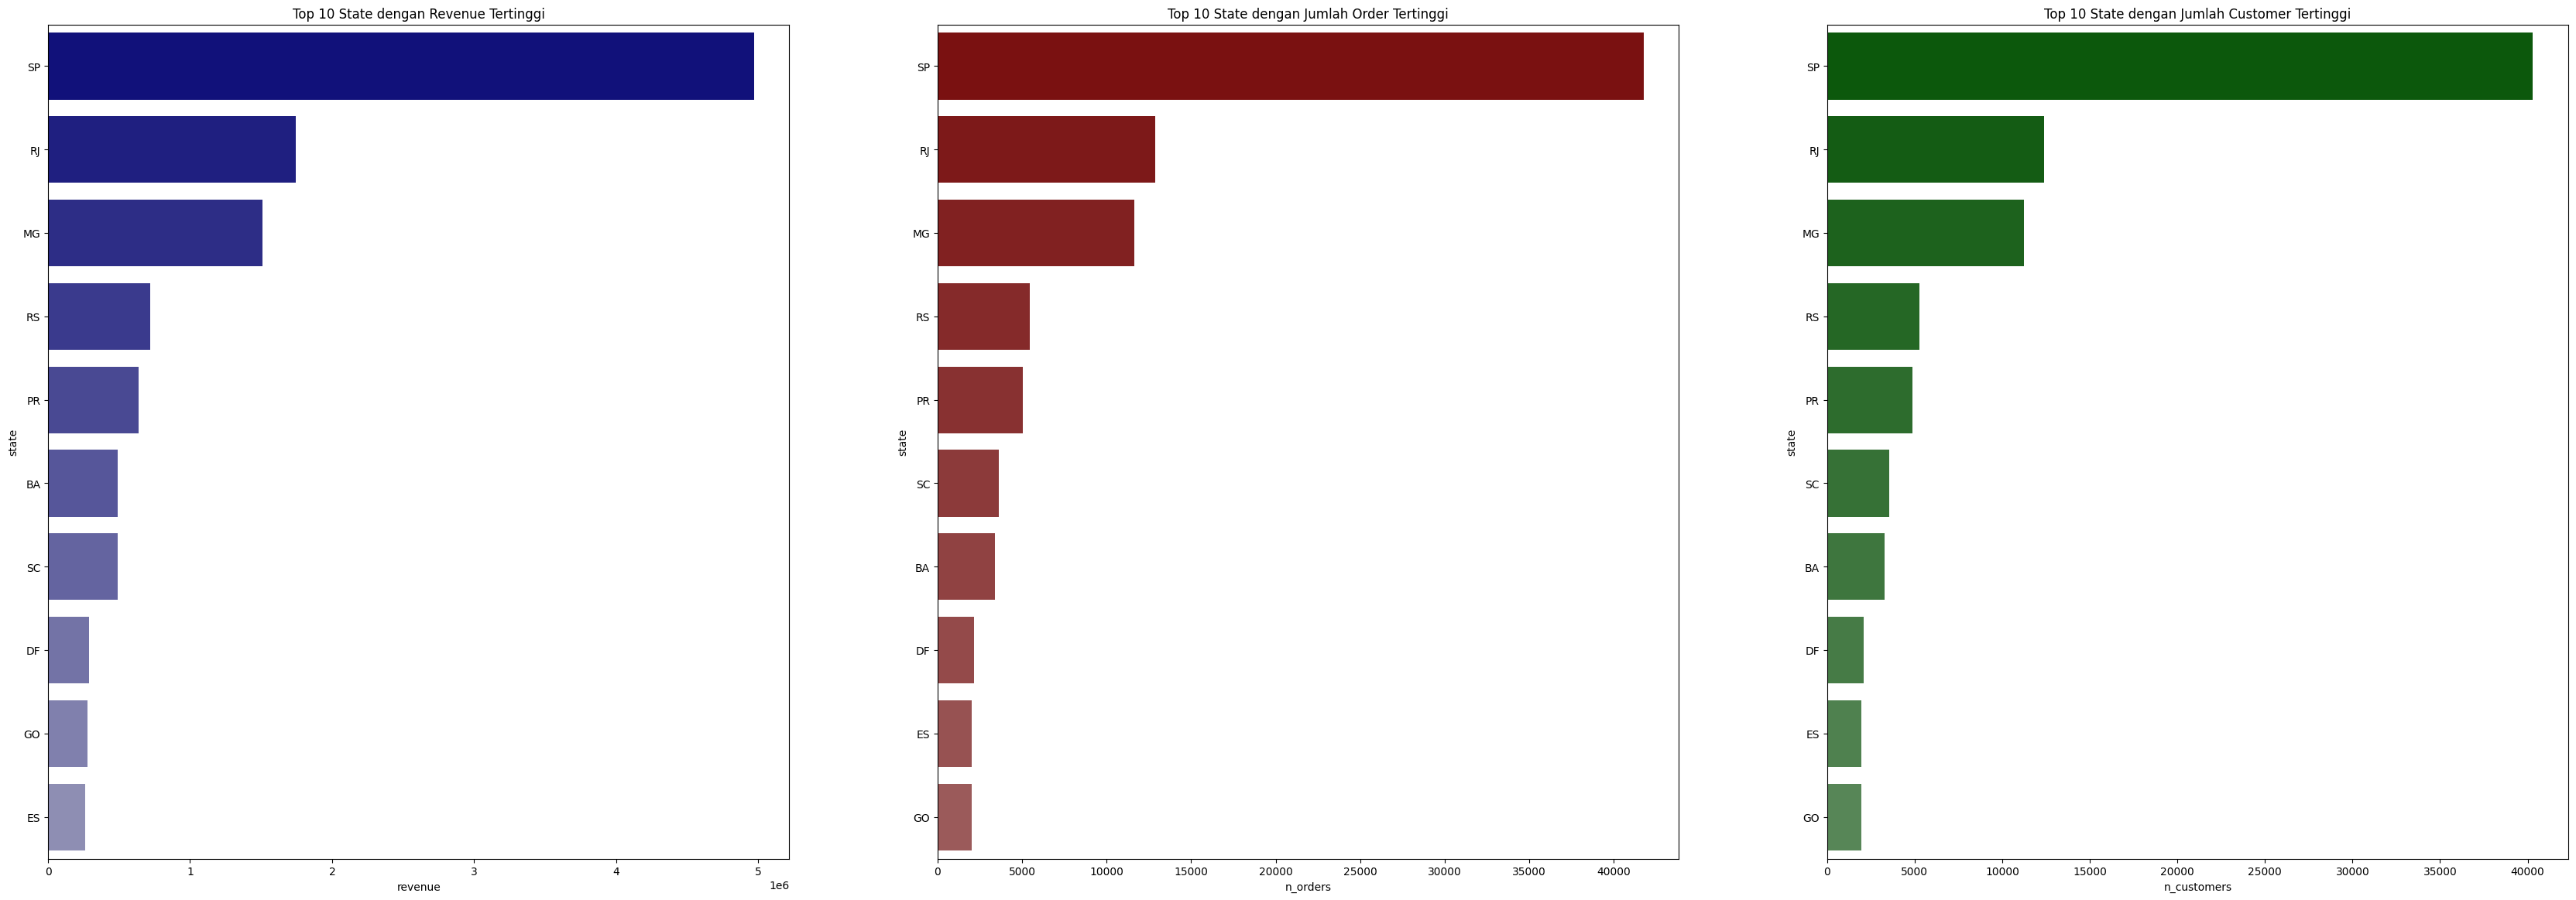

In [18]:
# Visualisasi
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
c2 = sns.blend_palette(['darkred', 'lightgrey'], 25)
c3 = sns.blend_palette(['darkgreen', 'lightgrey'], 25)

fig, axes = plt.subplots(1,3, figsize=(42, 14))
sns.barplot(data=dfState.nlargest(10, columns='revenue'), x = 'revenue', y='state', palette=c1, ax=axes[0])
sns.barplot(data=dfState.nlargest(10, columns='n_orders'), x = 'n_orders', y='state', palette=c2, ax=axes[1])
sns.barplot(data=dfState.nlargest(10, columns='n_customers'), x = 'n_customers', y='state', palette=c3, ax=axes[2])
axes[0].title.set_text('Top 10 State dengan Revenue Tertinggi')
axes[1].title.set_text('Top 10 State dengan Jumlah Order Tertinggi')
axes[2].title.set_text('Top 10 State dengan Jumlah Customer Tertinggi')
plt.show()

> - Sao Paulo (SP) menjadi state yang memiliki revenue, jumlah order, dan jumlah customer tertinggi
> - Hal ini berarti dari tahun 2016 - 2018 terlihat bahwa Sao Paulo menjadi state pusat konsumen Olist
> - Berdasarkan domain knowlegde hal tersebut cukup beralasan karena Sao Paulo merupakan state dengan populasi dan GDP terbanyak di Brazil *[[Source]](https://en.wikipedia.org/wiki/Federative_units_of_Brazil#List)*

#### **Sales berdasarkan Produk**

In [19]:
# buat data untuk analisis top revenue, order, dan jumlah customer berdasarkan produk
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('product_category_name_english')['price'].sum()
dfOrd = data_eda.groupby('product_category_name_english')['order_id'].nunique()
dfCust = data_eda.groupby('product_category_name_english')['customer_unique_id'].nunique()

dfProd = pd.concat([dfRev,dfOrd,dfCust], axis=1).reset_index().rename(columns={"price": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers", 'product_category_name_english':'product'})

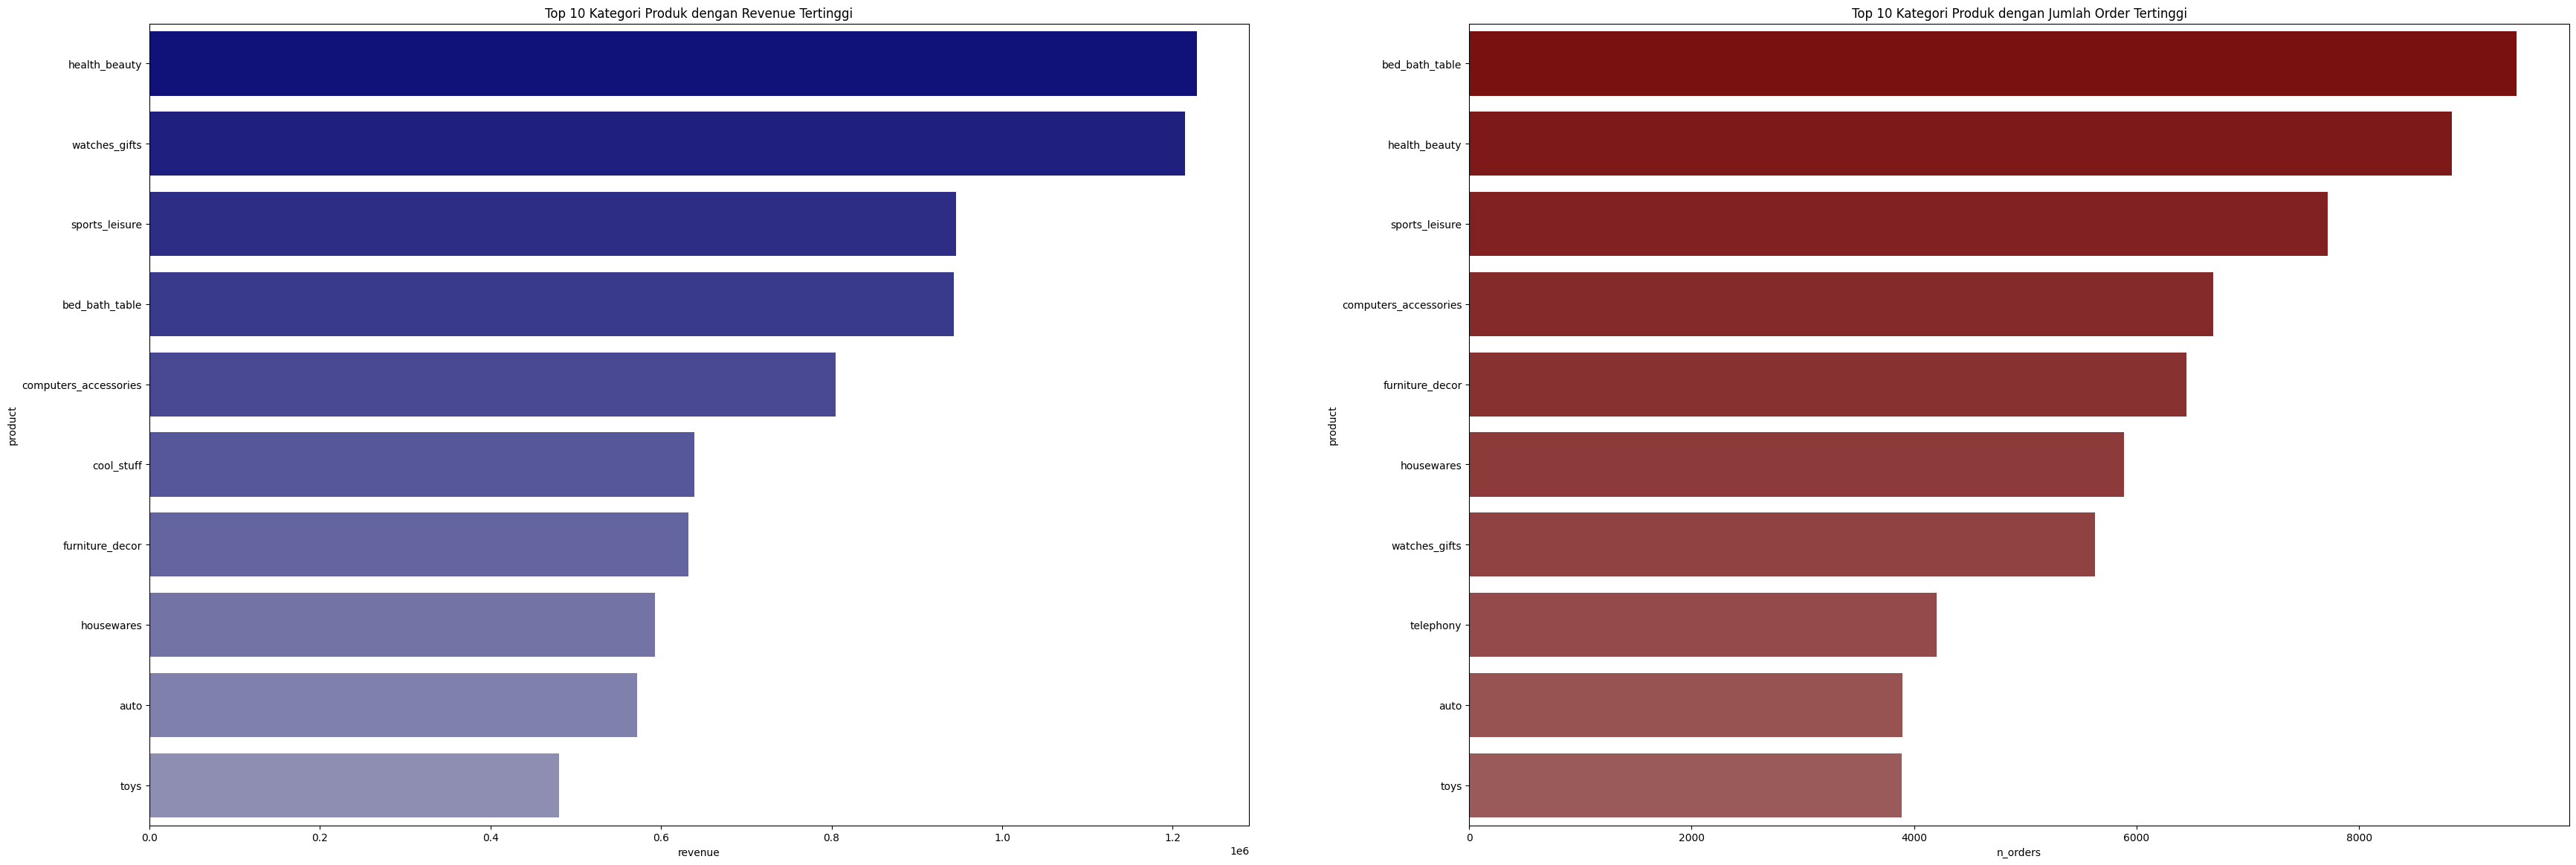

In [20]:
# Visualisasi
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
c2 = sns.blend_palette(['darkred', 'lightgrey'], 25)

fig, axes = plt.subplots(1,2, figsize=(42, 14))
sns.barplot(data=dfProd.nlargest(10, columns='revenue'), x = 'revenue', y='product', palette=c1, ax=axes[0])
sns.barplot(data=dfProd.nlargest(10, columns='n_orders'), x = 'n_orders', y='product', palette=c2, ax=axes[1])

axes[0].title.set_text('Top 10 Kategori Produk dengan Revenue Tertinggi')
axes[1].title.set_text('Top 10 Kategori Produk dengan Jumlah Order Tertinggi')

plt.show()

> - Berdasarkan revenue, health_beauty merupakan kategori produk dengan revenue tertinggi
> - Berdasarkan jumlah order, bed_bath_table merupakan kategori produk dengan revenue tertinggi

#### **Customer Behaviour**

##### **Waktu Pembelian**

In [21]:
# buat fitur baru order_hour, day_of_week, dan day_name
data_eda['order_hour'] = data_eda['order_purchase_timestamp'].dt.strftime('%H').astype('int')
data_eda['day_of_week'] = data_eda['order_purchase_timestamp'].dt.day_of_week
data_eda['day_name'] = data_eda['day_of_week'].map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })

# buat dataset dfTime yang berisi waktu pembelian dan jumlah customer
dfTime = data_eda.drop_duplicates(subset='order_id').groupby(by=['order_hour','day_of_week','day_name'])['order_id'].nunique().reset_index()

# buat pivot table dari dfTime
timePur = dfTime.pivot_table(values='order_id', index='order_hour', columns=['day_of_week','day_name'],aggfunc='sum')

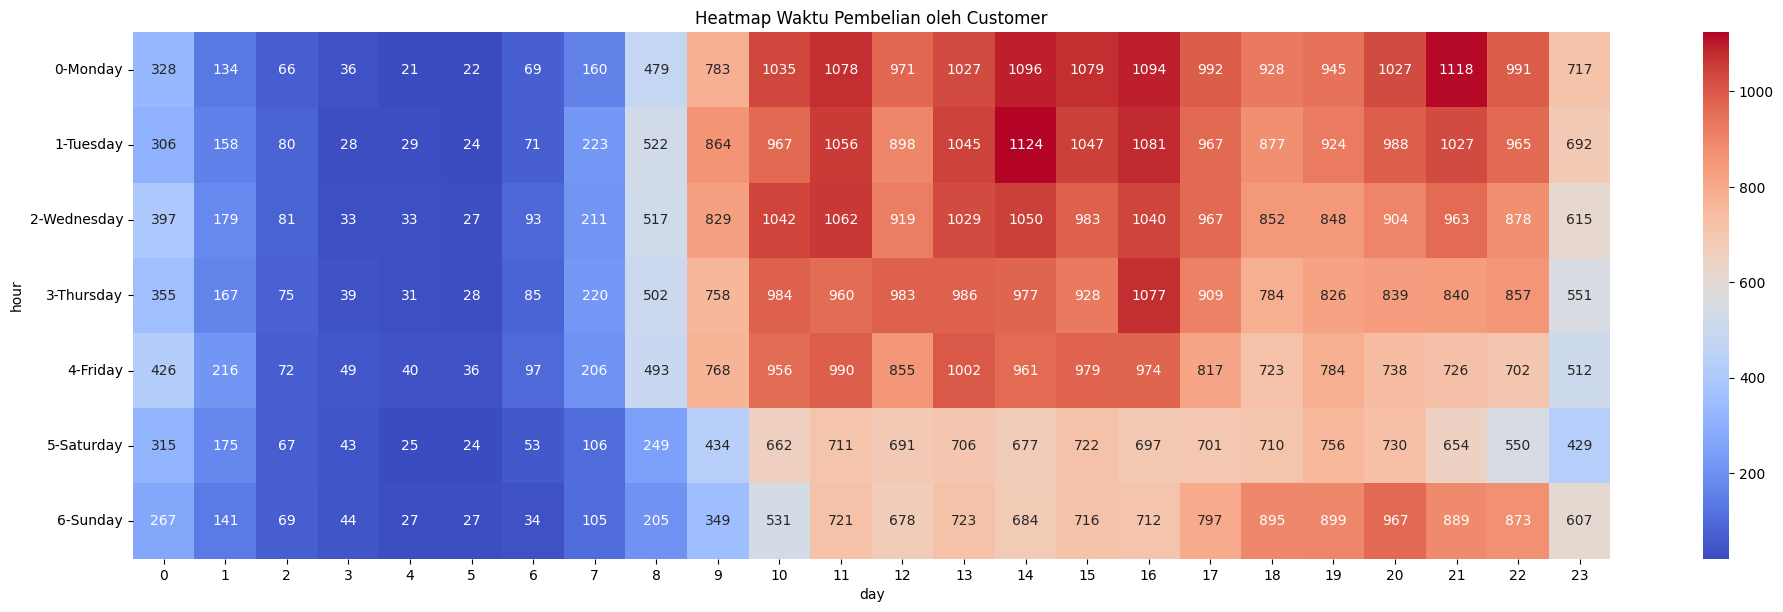

In [22]:
# buat visualisasi heatmap
plt.figure(figsize=(20,6))

sns.heatmap(timePur.T,
            annot=True,
            fmt='g',
            cmap='coolwarm',)

plt.tight_layout()
plt.xlabel('day')
plt.ylabel('hour')
plt.title('Heatmap Waktu Pembelian oleh Customer')
plt.show()

> - Berdasarkan heatmap diatas, customer olist paling banyak berbelanja pada hari senin dan selasa
> - Secara umum, waktu yang paling diminati untuk berbelanja adalah dari jam 10 pagi sampai 10 malam

##### **Tipe Pembayaran**

In [23]:
# buat data untuk analisis top order berdasrakan tipe pembayaran
dfPay = data_eda.groupby('payment_type')['order_id'].nunique()
dfPay = dfPay.sort_values(ascending=False).reset_index().rename(columns={'order_id': 'n_orders'})

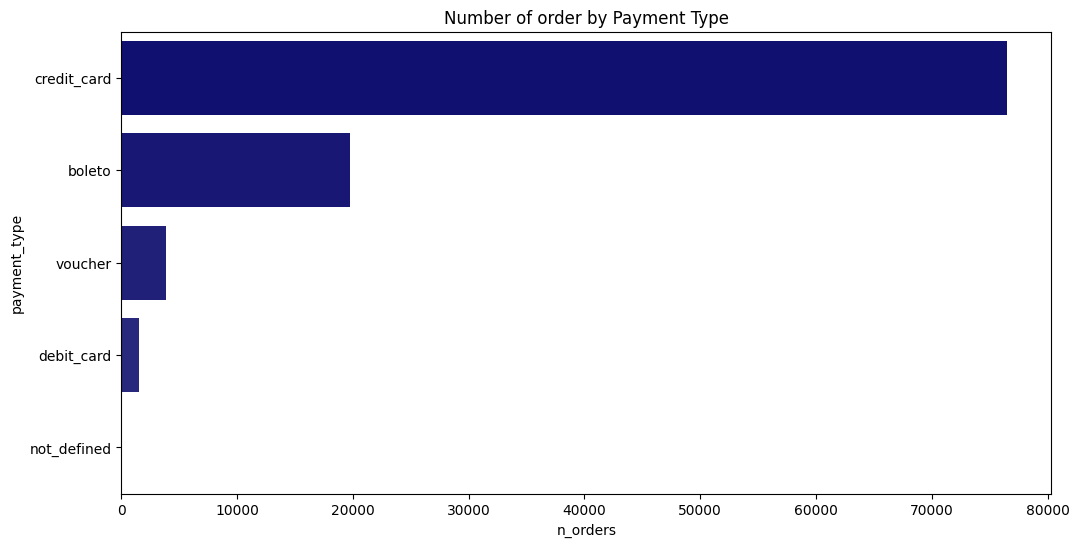

In [24]:
color_palette = sns.blend_palette(['navy', 'lightgrey'], 25)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=dfPay, x = 'n_orders', y='payment_type', palette=color_palette)
plt.title(f'Number of order by Payment Type')
plt.show()

> - Kebanyakan customer membayar menggunakan credit_card

##### **Installment**

In [25]:
data_eda['installment_type'] = data_eda['payment_installments'].apply(lambda x: 'lunas' if x > 1 else 'cicilan')

In [26]:
insType = data_eda.groupby('installment_type')['order_id'].nunique()
insType

installment_type
cicilan    49063
lunas      51170
Name: order_id, dtype: int64

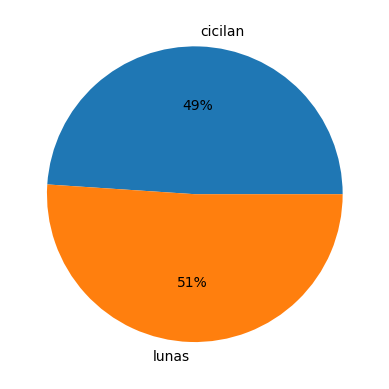

In [27]:
plt.pie(insType, labels=insType.index, autopct='%.0f%%');

> - Tidak ada perbedaan yang signifikan antara pembayaran secara cicilan dan lunas

#### **Customer Retention**

##### **Retention Rate**

In [28]:
dfCohort = data_eda.drop_duplicates(subset='order_id', keep='first')[['customer_unique_id', 'order_month']]
dfCohort['cohort_month'] = dfCohort.groupby('customer_unique_id')['order_month'].transform('min')
dfCohort.head()

,customer_unique_id,order_month,cohort_month
0,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09
2,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09
3,009b0127b727ab0ba422f6d9604487c7,2016-09,2016-09
4,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
5,0eb1ee9dba87f5b36b4613a65074337c,2016-10,2016-10


In [29]:
# Number of distinct customer
dfCohort = dfCohort.groupby(['order_month','cohort_month'])\
            .agg(n_customers = ('customer_unique_id', 'nunique'))\
            .reset_index(drop=False)

# Period = current month - cohort month
dfCohort['period'] = (dfCohort['order_month'] - dfCohort['cohort_month']).apply(attrgetter('n'))

dfCohort.head()

,order_month,cohort_month,n_customers,period
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-12,2016-12,1,0
3,2017-01,2016-12,1,1
4,2017-01,2017-01,764,0


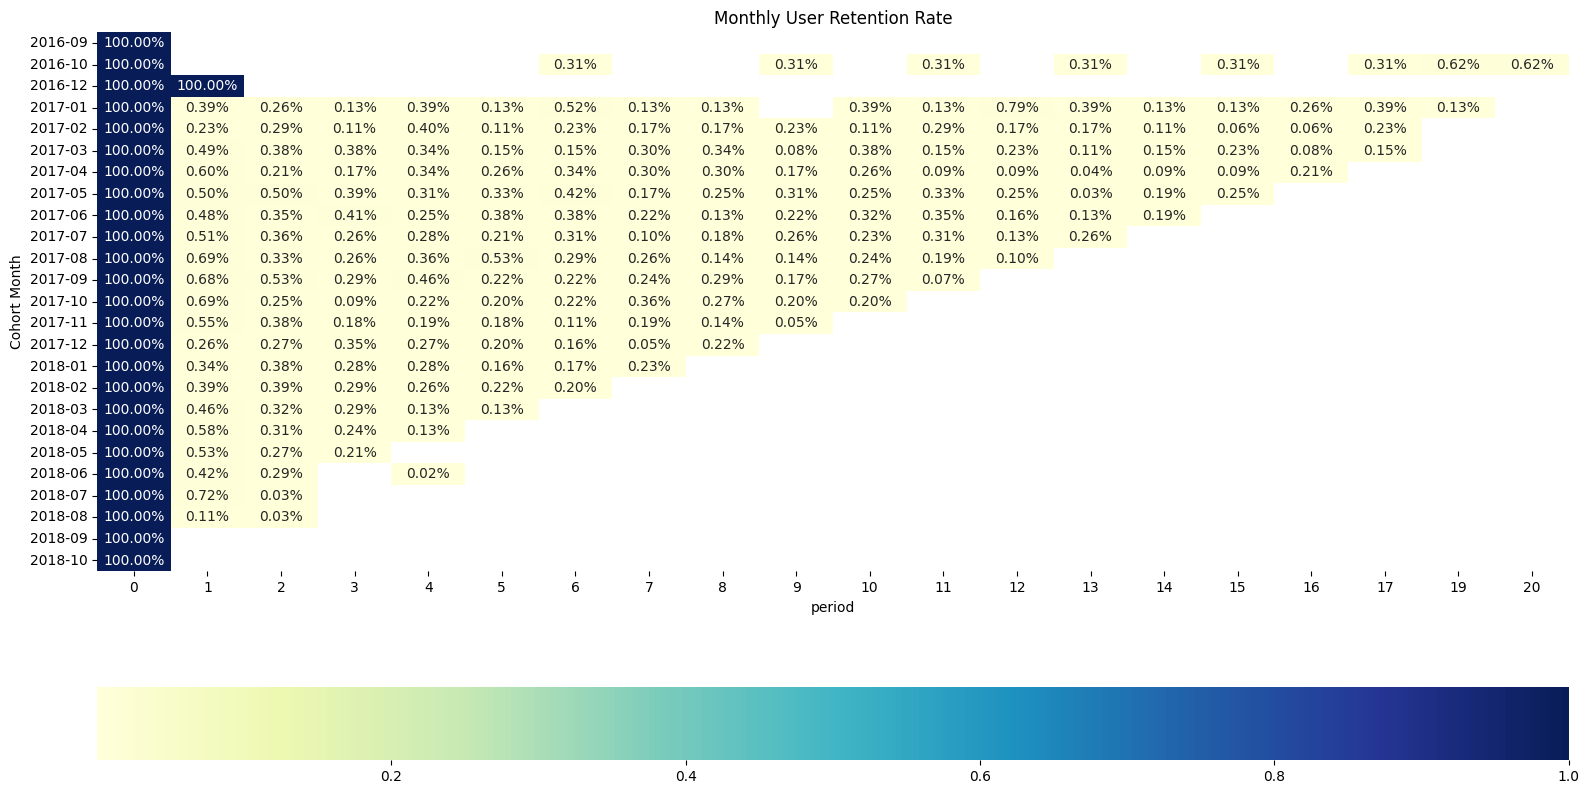

In [30]:
# Pivot Cohort
pivot_cohort = dfCohort.pivot_table(index='cohort_month', columns='period', values='n_customers')
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

plt.figure(figsize=(16,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlGnBu',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()

> - Berdasarkan heatmap diatas, dapat dilihat bahwa secara umum retention rate konsumen sangat rendah, bahkan tidak sampai 1% 

##### **Customer**

In [31]:
dfOrd = data_eda.groupby('customer_unique_id')['order_id'].nunique().reset_index().rename(columns={'order_id': 'n_orders'})
dfOrd['orders_remarks'] = dfOrd['n_orders'].apply(lambda x: '> 1 orders' if x > 1 else '1 order')
dfOrd.nlargest(5, columns='n_orders')

,customer_unique_id,n_orders,orders_remarks
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17,> 1 orders
23472,3e43e6105506432c953e165fb2acf44c,9,> 1 orders
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,> 1 orders
37797,6469f99c1f9dfae7733b25662e7f1782,7,> 1 orders
76082,ca77025e7201e3b30c44b472ff346268,7,> 1 orders


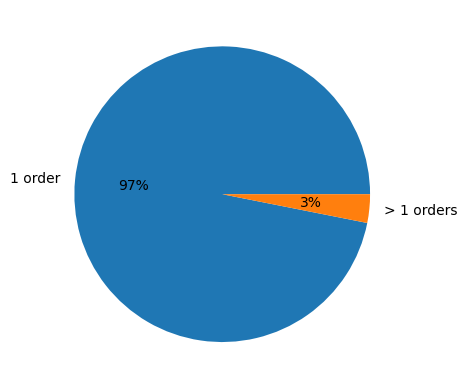

In [32]:
ordRem = dfOrd['orders_remarks'].value_counts()

plt.pie(ordRem, labels=ordRem.index, autopct='%.0f%%');

> - Jika dilihat proporsinya, bahkan hanya 3% dari total customer yang melakukan order > 1 kali